# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing train dataset

In [2]:
dt = pd.read_csv("../ML_Codons_Technology/DataSets/Train_schedule.csv")
df = pd.read_csv("../ML_Codons_Technology/DataSets/Railway_info.csv")

In [3]:
tt = pd.read_csv("../ML_Codons_Technology/DataSets/Train_schedule.csv")

In [4]:
dt.shape

(186074, 12)

In [5]:
df.shape

(11113, 5)

Here variable dt has complete deatils of each train such as arrival and departure time on each station of particular train and variable df has source and destination name of each train

In [6]:
dt.head()

,SN,Train_No,Station_Code,1A,2A,3A,SL,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance
0,1,107,SWV,100,100,100,100,SAWANTWADI R,1,00:00:00,10:25:00,0
1,2,107,THVM,260,228,196,164,THIVIM,1,11:06:00,11:08:00,32
2,3,107,KRMI,345,296,247,198,KARMALI,1,11:28:00,11:30:00,49
3,4,107,MAO,490,412,334,256,MADGOAN JN.,1,12:10:00,00:00:00,78
4,1,108,MAO,100,100,100,100,MADGOAN JN.,1,00:00:00,20:30:00,0


In [7]:
df.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday


In [8]:
dt.Station_Name.nunique()

8099

There are total 8099 Stations in this whole data

In [9]:
dt.Train_No.nunique()

11113

Total No of trains in dataset - 1113

# Data Preprocessing

## checking Null Values

In [10]:
df.isnull().sum()

Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64

In [11]:
dt.isnull().sum()

SN                0
Train_No          0
Station_Code      0
1A                0
2A                0
3A                0
SL                0
Station_Name      0
Route_Number      0
Arrival_time      0
Departure_Time    0
Distance          0
dtype: int64

## Removing unwanted columns

In [12]:
dt = dt.drop(columns=["1A","2A","3A","SL"],axis = 1)

In [13]:
dt["Arrival_time"] = dt["Arrival_time"].replace('[:]','',regex =True)
dt["Departure_Time"] = dt["Departure_Time"].replace("[:]",'', regex = True)

In [14]:
dt.Arrival_time = dt.Arrival_time.astype("int64")
dt.Departure_Time = dt.Departure_Time.astype("int64")

In [15]:
dt

,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance
0,1,107,SWV,SAWANTWADI R,1,0,102500,0
1,2,107,THVM,THIVIM,1,110600,110800,32
2,3,107,KRMI,KARMALI,1,112800,113000,49
3,4,107,MAO,MADGOAN JN.,1,121000,0,78
4,1,108,MAO,MADGOAN JN.,1,0,203000,0
...,...,...,...,...,...,...,...,...
186069,1,22439,NDLS,NEW DELHI,1,0,60000,0
186070,2,22439,UMB,AMBALA CANT JN,1,80800,81000,199
186071,3,22439,LDH,LUDHIANA JN,1,91900,92100,312
186072,4,22439,JAT,JAMMU TAWI,1,123800,124000,577


In [16]:
dt['Station_Name'] = dt['Station_Name'].replace("[' ','.']","",regex = True)

In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186074 entries, 0 to 186073
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SN              186074 non-null  int64 
 1   Train_No        186074 non-null  int64 
 2   Station_Code    186074 non-null  object
 3   Station_Name    186074 non-null  object
 4   Route_Number    186074 non-null  int64 
 5   Arrival_time    186074 non-null  int64 
 6   Departure_Time  186074 non-null  int64 
 7   Distance        186074 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 11.4+ MB


# Data Optimization 

## Converting time into integer to categorize timing in morning, afternoon, night, etc.

In [18]:
def time(x):
    if x >= 0 and x < 50000:
        return 'Mid_night'
    elif x >=50000 and x < 80000:
        return 'Early_morning'
    elif x >= 80000 and x < 120000:
        return 'Morning'
    elif x >= 120000 and x < 170000:
        return 'Afternoon'
    elif x >= 170000 and x < 200000:
        return 'Evening'
    else:
        return 'Night'
    
dt['Time'] = dt.Departure_Time.apply(time)

In [19]:
dt['Time'] = dt.Departure_Time.apply(time)

# Dashboard 

Enter the Source_Station_Name BHANDARARD


Available destinations are  ['ADITYAPUR' 'AGRACANTT' 'AHMADNAGAR' 'AHMEDABAD' 'AJNI' 'AKALTARA'
 'AKOLAJN' 'ALLEPPEY' 'ALWAYE' 'AMALNER' 'AMBALACANTT' 'AMBALACITY'
 'AMBLE' 'AMBODALA' 'AMGAON' 'AMLAJN' 'AMRITSARJN' 'ANANDJN' 'ANGAMALI(FO'
 'ANGUL' 'BABINA' 'BADNERAJN' 'BAGBAHRA' 'BAGDIHI' 'BAIKUNTH' 'BAKAL'
 'BALANGIR' 'BALHARSHAH' 'BALLABGARH' 'BALPUR' 'BALUGAN' 'BAMRA' 'BANMORE'
 'BARABAMBO' 'BARADWAR' 'BARARA' 'BARDOLI' 'BARGARHROAD' 'BASAI' 'BEASJN'
 'BELAPUR' 'BELHA' 'BELLAMPALLI' 'BELPAHAR' 'BERHAMPUR' 'BETUL'
 'BHALULATA' 'BHANDARARD' 'BHARUCHJN' 'BHATAPARA' 'BHAVANINAGA' 'BHILAI'
 'BHILAINAGAR' 'BHILAIPOWER' 'BHILAVDI' 'BHOPAL' 'BHUBANESWAR'
 'BHUPADEOPUR' 'BHUSAVALJN' 'BILASPURJN' 'BINA' 'BIRBANS' 'BISRA'
 'BMYACABIN' 'BMYCCABIN' 'BMYDCABIN' 'BMYGCABIN' 'BMYHCABIN' 'BOBBILIJN'
 'BODWAD' 'BOINDA' 'BONDAMUNDAJ' 'BORTALAO' 'BRAJARAJNAGA' 'CHACHER'
 'CHAKARADHARP' 'CHAKARBHATHA' 'CHAKULIA' 'CHALAKUDI' 'CHALISGAONJ'
 'CHAMPAJN' 'CHANDRAPUR

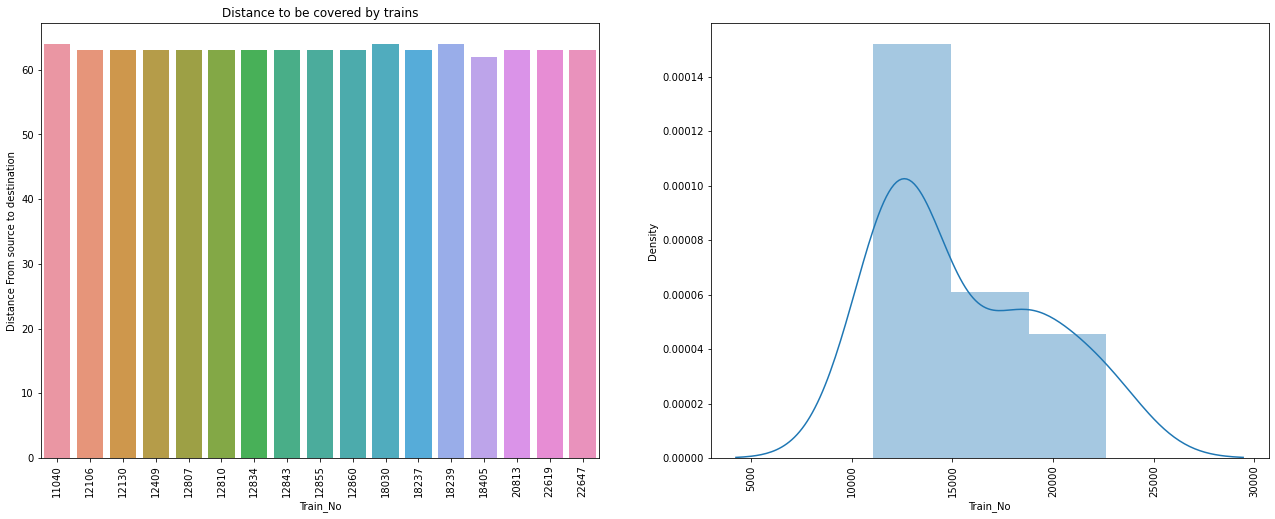

NUMBER of trains Available 

Afternoon        6
Morning          4
Night            3
Mid_night        2
Evening          1
Early_morning    1
Name: Time, dtype: int64

Enter train number: 11040

Train name:  ['MAHARASHTRA']

Train Route:  ['GONDIA JN.'] ---> ['CHHATRAPATI SHAHU MAHARAJ TERMINUS']

Stations:  ['GONDIAJN' 'TIRORA' 'TUMSARRD' 'BHANDARARD' 'KAMPTEE' 'ITWARIJN'
 'NAGPURJN(C' 'AJNI' 'SEWAGRAM' 'WARDHAJN' 'PULGAONJN' 'DHAMANGAON'
 'CHANDUR' 'BADNERAJN' 'MURTAJAPURJ' 'AKOLAJN' 'SHEGAON' 'JALAMBJN'
 'NANDURA' 'MALKAPUR' 'BODWAD' 'VARANGAON' 'BHUSAVALJN' 'JALGAONJN'
 'PACHORAJN' 'CHALISGAONJ' 'NANDGAON' 'MANMADJN' 'YEOLA' 'KOPARGAON'
 'PUNTAMBA' 'BELAPUR' 'AHMADNAGAR' 'DAUNDJN' 'KEDGAON' 'URULI' 'PUNEJN'
 'GHORPURI' 'JEJURI' 'NIRA' 'LONAND' 'WATHAR' 'JARANDESHWAR' 'SATARA'
 'KOREGAON' 'RAHIMATPUR' 'TARGAON' 'MASUR' 'KARAD' 'BHAVANINAGA' 'TAKARI'
 'KIRLOSKARWA' 'BHILAVDI' 'SANGLI' 'MIRAJJN' 'JAYASINGPUR' 'HATKANANGALE'
 'RUKADI' 'VALIVADE' 'CHHATRAPATI']

Your Route:  BHANDARARD

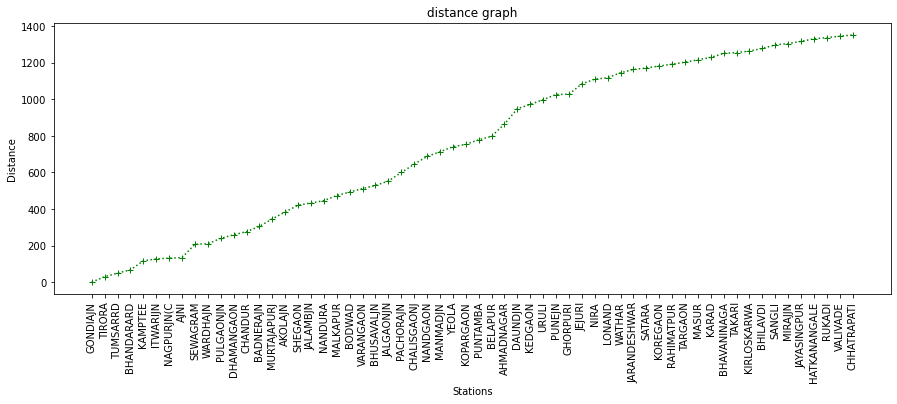

,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance,Time
5543,1,11040,G,GONDIAJN,1,82000,82000,0,Morning
5544,2,11040,TRO,TIRORA,1,84000,84200,29,Morning
5545,3,11040,TMR,TUMSARRD,1,85800,90000,49,Morning
5546,4,11040,BRD,BHANDARARD,1,91300,91500,67,Morning
5547,5,11040,KP,KAMPTEE,1,94600,94800,116,Morning
5548,6,11040,ITR,ITWARIJN,1,100600,100800,127,Morning
5549,7,11040,NGP,NAGPURJN(C,1,104000,105500,131,Morning
5550,8,11040,AJNI,AJNI,1,110300,110400,134,Morning
5551,9,11040,SEGM,SEWAGRAM,1,120200,120300,207,Afternoon
5552,10,11040,WR,WARDHAJN,1,121000,121300,210,Afternoon


In [29]:
station_name = input("Enter the Source_Station_Name ")

station_name_table = dt[(dt.Station_Name == station_name)]  #detail of all trains that visit our source station

train_number_unique = station_name_table.Train_No.unique() 

train_number_visit = dt[dt.Train_No.isin(train_number_unique)]  # train number of each train that visit our source station 

available_destination = train_number_visit.Station_Name.unique()  #all available destinations from our source station

available_destination.sort() #sorting available destination

print("\n\nAvailable destinations are ",available_destination) #print available destinations

destination = input("\n\nEnter the Destination_Station_Name ")

destintion_train = train_number_visit[(train_number_visit.Station_Name == destination)] #all the trains that visit our destinstination from source station

destintion_train_unique = destintion_train.Train_No.unique()  #train number of each train that visits our destination from source station

available_train = df[df.Train_No.isin(destintion_train_unique)] #extract train number from df using destination_train



print("\n\nAvailable Trains are :")

#using above code we found the train which visits both the stations but some train travel from 
#destination to source station which is opposite in direction hence we need to remove those trains  

available_train = available_train.set_index('Train_No')
print("")
di = []
for i in available_train.index:
    
    dista = dt[dt['Train_No'] == i]
    sorc = dista[dista['Station_Name'] == station_name]
    destina = dista[dista['Station_Name'] == destination]
    
    distance = destina.Distance.unique() - sorc.Distance.unique()
 
    distance = int(distance)
    if(distance<=0):
        available_train = available_train.drop([i], axis = 0)
    else:
        di.append(distance)

available_train = available_train.reset_index()
print(available_train)    #print available trains

#various plots for eazy visualization for various train details

fig = plt.figure(figsize=[22 ,8])


p1 = fig.add_subplot(121)        
sb.barplot(available_train.Train_No, di) #di distance covered by
plt.xticks(rotation = 90)
plt.ylabel('Distance From source to destination')
plt.title('Distance to be covered by trains')

p4 = fig.add_subplot(122)
sb.distplot(available_train.Train_No)
plt.xticks(rotation = 90) 

plt.show()

print("NUMBER of trains Available \n")
aa = available_train.Train_No.unique()
bb = dt[(dt.Train_No.isin(aa))]
dd = bb[(bb.Station_Name == station_name)]
count = dd.Time.value_counts()
print(count)

print("")
tno = int(input('Enter train number: ')) #select train
print("")
sorcdest = df[df['Train_No']==tno]
trainno  = dt[dt['Train_No'] == tno]
    
print('Train name: ',sorcdest.Train_Name.unique())
print("")
print('Train Route: ',sorcdest.Source_Station_Name.unique(),"--->",sorcdest.Destination_Station_Name.unique()) #Train Route
print("")

print('Stations: ',trainno.Station_Name.unique())
print("")
print("Your Route: ", station_name, "--->", destination) #your route
print("")
                                           
print("")
src = trainno[trainno['Station_Name'] == station_name]
dst = trainno[trainno['Station_Name'] == destination]
    
trno = tt[tt.Train_No == tno]      # Extracting time from main data
un = station_name_table.Station_Code.unique()
uun = un[0]
time  = trno[trno.Station_Code == uun]
    
distance =  dst.Distance.unique() - src.Distance.unique() #Calculate distance to be covered by our train from source to destination station 
print("Distance: ",distance, '   Time: ' , src.Time.unique(),'',time.Departure_Time.unique())
print("")

fig = plt.figure(figsize=[15 ,5])
plt.plot(trainno.Station_Name, trainno.Distance, 'g:+', label="Year vs GDPperCapita")
plt.xlabel('Stations')
plt.ylabel('Distance')
plt.title('distance graph')
plt.xticks(rotation = 90)
plt.show()

trainno    #details of selected train in dataframe 
